## Ahora vamos a analizar la red que hemos extraído de X

### Cargamos los datos extraídos con pandas para sacar los nodos y las aristas

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('red_social.csv')
df

,Source,Target
0,PauGoku88,FCBarcelona
1,moreni_keji100,FCBarcelona
2,Lamar_III99,FCBarcelona
3,dybmal,FCBarcelona
4,danish_hafid,FCBarcelona
...,...,...
18753,Jerometal,marca
18754,Dvd19857,marca
18755,perdi26,marca
18756,JoseMan12944328,marca


In [3]:
nodes = list(df['Source'].unique()) + list(df['Target'].unique())
edges = [(df.loc[i, 'Source'], df.loc[i, 'Target']) for i in range(df.shape[0])]

### Una vez tenemos los nodos y las aristas creamos el grafo con NetworkX

In [4]:
G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

print(f'Número de nodos: {G.number_of_nodes()}')
print(f'Número de aristas: {G.number_of_edges()}')

Número de nodos: 15583
Número de aristas: 18757


### Estadísticas generales:

In [7]:
# Miramos cúales son los nodos con más grado
degrees = [(v, G.degree(v)) for v in G]
degrees.sort(key= lambda x: -x[1])
degrees[:10]

[('FCBarcelona', 1584),
 ('marca', 1350),
 ('realmadrid', 1251),
 ('ArchivoVAR', 909),
 ('elchiringuitotv', 884),
 ('AlbertOrtegaES1', 874),
 ('Osasuna', 819),
 ('valenciacf', 786),
 ('GetafeCF', 674),
 ('Atleti', 635)]

In [11]:
grado_medio = round((2 * G.number_of_edges()) / G.number_of_nodes(), 4)
densidad = nx.density(G)

print(f'El grado medio de la red es: {grado_medio}')
print(f'La densidad de la red es: {densidad:.6f}')

El grado medio de la red es: 2.4074
La densidad de la red es: 0.000154


El `grado medio` de la red es de `2.4074` y su `densidad` de `0.000154`. Esto quiere decir que en la red no se producen muchas interacciones entre nodos distintos.

In [5]:
componentes_conexas = list(nx.connected_components(G))
print(f'Número de componentes conexas: {len(componentes_conexas)}')

Número de componentes conexas: 1


In [ ]:
# Ahora vamos a comprobar el betweenes
betweenes = nx.betweenness_centrality(G)
betweenes

{'PauGoku88': 0.00075377614258094,
 'moreni_keji100': 0.0,
 'Lamar_III99': 0.0,
 'dybmal': 0.0,
 'danish_hafid': 0.0,
 'khalifaslimxx': 0.0,
 'c1castro_': 0.0,
 'Charles90651431': 0.0,
 'Race006R': 0.0,
 'ochuko_dav46846': 0.0,
 '0xAdeen': 0.0,
 'sparks1988': 0.0,
 'chechaouen': 0.0,
 'messii_472': 0.0,
 'Futboltop109': 0.0,
 'official_sonwa': 0.0,
 'QwabenaAroma': 0.0,
 'ElVaderCule': 0.0001403116669062366,
 'real_FBA': 0.0,
 'nonnyboy160692': 0.0,
 '_Khalidszn': 0.0,
 'eminiGaa': 0.0,
 'Kunatyperek91': 0.0,
 'MarieMulon69115': 0.0,
 'FOviekhiri': 0.0,
 'Aanzz12_': 0.0,
 'OAbdulridah': 0.0,
 'Okwudilidave': 0.0,
 'LamineRole': 0.00021402907458199742,
 'iamkhaleed_1601': 0.0,
 'KhumaloFk': 0.0,
 'ELSUGE4': 0.0,
 'barcamomos': 0.00022852817476838537,
 'daraxbt': 0.0,
 'ThabisoMalatj27': 0.0,
 'Riyash_TR': 0.0,
 'arifalhzm': 0.0,
 'JamaicaMafia': 0.0,
 'MrBigBankss': 0.0,
 'lmgrala': 0.0,
 'ItzMbMessi': 0.0,
 'kpoppy088': 0.0,
 'PECAMADRIDISTA': 0.0,
 'LukemeMarius': 0.0,
 'ronaldhinson3

In [16]:
betweenes_list = [(v, betweenes[v]) for v in betweenes]
betweenes_list.sort(key= lambda x: -x[1])
betweenes_list[:10]

[('marca', 0.19751460966772516),
 ('FCBarcelona', 0.18110351933971977),
 ('realmadrid', 0.1407343013453953),
 ('AlbertOrtegaES1', 0.09559023088719877),
 ('Osasuna', 0.09462569245795144),
 ('ArchivoVAR', 0.08859774937545226),
 ('elchiringuitotv', 0.08802239935799488),
 ('valenciacf', 0.08745492697644848),
 ('GetafeCF', 0.08025900661756163),
 ('SevillaFC', 0.072509956167722)]

In [ ]:
# Analizamos el clustering
clustering = nx.clustering(G)
clustering_list = [(v, clustering[v]) for v in clustering]
clustering_list.sort(key= lambda x: -x[1])
clustering_list[:10]

[('MarcosJarBur', 1.0),
 ('Goldnvp', 1.0),
 ('eduardo_pap', 1.0),
 ('braaumi_', 1.0),
 ('alejandro40028', 1.0),
 ('WithStyle22', 1.0),
 ('rupertdax', 1.0),
 ('Alexxby20', 1.0),
 ('Spun78', 1.0),
 ('gxldelaamine', 1.0)]

### Medidas sobre los caminos geodésicos:

In [6]:
# Ahora vamos a calcular todos los caminos mínimos entre los nodos
l = dict(nx.all_pairs_shortest_path_length(G))

In [22]:
nx.eccentricity(G, sp= l)

{'PauGoku88': 6,
 'moreni_keji100': 6,
 'Lamar_III99': 6,
 'dybmal': 6,
 'danish_hafid': 6,
 'khalifaslimxx': 6,
 'c1castro_': 6,
 'Charles90651431': 6,
 'Race006R': 6,
 'ochuko_dav46846': 6,
 '0xAdeen': 6,
 'sparks1988': 6,
 'chechaouen': 6,
 'messii_472': 6,
 'Futboltop109': 6,
 'official_sonwa': 6,
 'QwabenaAroma': 6,
 'ElVaderCule': 6,
 'real_FBA': 6,
 'nonnyboy160692': 6,
 '_Khalidszn': 6,
 'eminiGaa': 6,
 'Kunatyperek91': 6,
 'MarieMulon69115': 6,
 'FOviekhiri': 6,
 'Aanzz12_': 6,
 'OAbdulridah': 6,
 'Okwudilidave': 6,
 'LamineRole': 6,
 'iamkhaleed_1601': 6,
 'KhumaloFk': 6,
 'ELSUGE4': 6,
 'barcamomos': 6,
 'daraxbt': 6,
 'ThabisoMalatj27': 6,
 'Riyash_TR': 6,
 'arifalhzm': 6,
 'JamaicaMafia': 6,
 'MrBigBankss': 6,
 'lmgrala': 6,
 'ItzMbMessi': 6,
 'kpoppy088': 6,
 'PECAMADRIDISTA': 6,
 'LukemeMarius': 6,
 'ronaldhinson33': 6,
 'ard1anta': 6,
 'DaveTambi': 6,
 'Itzbabkid': 6,
 'NeptuneWayne': 6,
 'madhurya_10': 6,
 'CulerIssa': 6,
 'xixchriss_': 6,
 'ealbertoe': 6,
 '__andddd__

In [7]:
# Calculamos la excentricidad
excentricidad = nx.eccentricity(G, sp=l)
df_excentricidad = pd.DataFrame(columns=['Nodo', 'Excentricidad'], data=excentricidad.items())

# Obtenemos los nodos más céntricos y más exteriores
menos_excentricidad = df_excentricidad.sort_values(by='Excentricidad').head(5)
menos_excentricidad.index = range(1, 6)
mas_excentricidad = df_excentricidad.sort_values(by='Excentricidad', ascending=False).head(5)
mas_excentricidad.index = range(1, 6)

print("Los nodos más céntricos de la red son:")
display(menos_excentricidad)

print("\nLos nodos más exteriores de la red son:")
display(mas_excentricidad)

Los nodos más céntricos de la red son:


,Nodo,Excentricidad
1,FCB_nenn,4
2,JMRM90,5
3,NonellMiquel,5
4,EvaMaria_HT_RBB,5
5,MTeresaBS1,5



Los nodos más exteriores de la red son:


,Nodo,Excentricidad
1,xsaguila,8
2,taniableh,8
3,SusodeToro1,8
4,oinebakia,8
5,susodang,8


In [10]:
radio = nx.radius(G)
print(f'El radio de la red es: {radio}')

El radio de la red es: 4


In [12]:
from collections import Counter

caminos = []
for i in l.keys():
    for j in l[i].keys():
        if l[i][j] != 0:
            caminos.append(l[i][j])
contador_caminos = Counter(caminos)

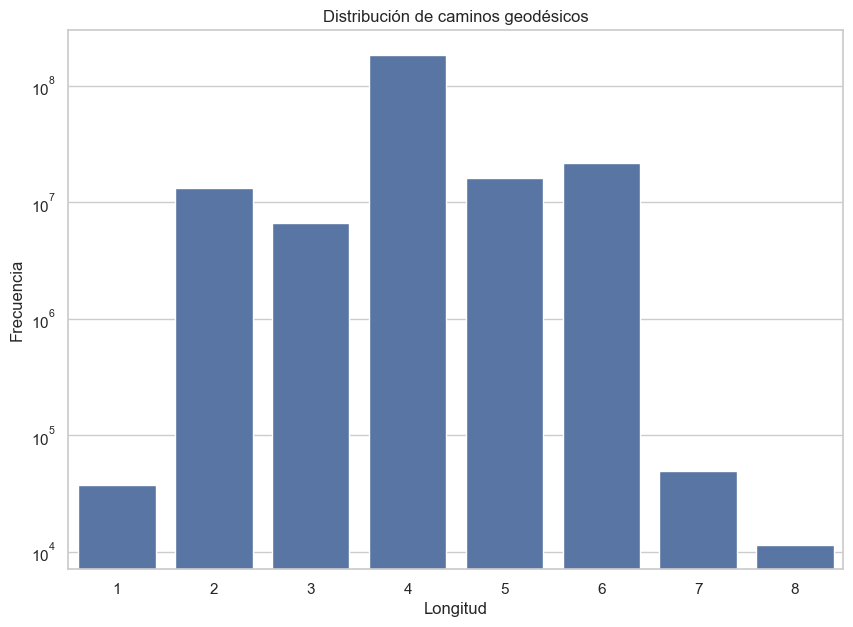

In [13]:
df_caminos = pd.DataFrame.from_dict(contador_caminos, orient='index').reset_index()
df_caminos.columns = ['Longitud', 'Frecuencia']
df_caminos = df_caminos.sort_values('Longitud')

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.barplot(x='Longitud', y='Frecuencia', ax=ax, data=df_caminos)
plt.title("Distribución de caminos geodésicos")
plt.show()

In [15]:
# Miramos la longitud de los caminos mínimos medio
camino_corto_promedio = round(nx.average_shortest_path_length(G),2)
print(f'La longitud del camino geodésico medio es: {camino_corto_promedio}')

La longitud del camino geodésico medio es: 4.11


### ¿Es la red de mundo pequeño?

In [16]:
# Miramos el diámetro de la red
diametro = nx.diameter(G)
print(f"El diámetro de la red es: {diametro}")

El diámetro de la red es: 8


El `diámetro` de la red es de `8`, por lo que no cumple el principio de 6 grados de separación.

In [17]:
clustering = nx.average_clustering(G)
transitividad = nx.transitivity(G)

print(f'El coeficiente de clustering es de: {clustering:.4f}')
print(f'La transitividad es de: {transitividad:.6f}')

El coeficiente de clustering es de: 0.0056
La transitividad es de: 0.000065


Dado que la red no cumple el principio de 6 grados de separación y cuenta con un coeficiente de clustering muy pequeño, podemos afirmar que no se ajusta a una red de mundo pequeño.

### Comparación con modelos aleatorios

In [18]:
# Comparamos con la de erdos-renyi
G_er = nx.erdos_renyi_graph(G.number_of_nodes(), nx.density(G))

In [19]:
grado_medio_er = round(2 * G_er.number_of_edges() / G_er.number_of_nodes(), 4)
print(f'El grado medio de la red aleatoria es {grado_medio_er} frente a la real que es {grado_medio}')

El grado medio de la red aleatoria es 2.3807 frente a la real que es 2.4074


In [12]:
print(f'El clustering medio de los nodos en el modelo aleatorio es {nx.average_clustering(G_er)} frente al real que es {nx.average_clustering(G)}')

El clustering medio de los nodos en el modelo aleatorio es 0.00013476224090354873 frente al real que es 0.005582184503987084


In [14]:
print(f'El modelo aleatorio tiene {len(list(nx.connected_components(G_er)))} componentes conexas frente al real que tiene {len(componentes_conexas)}')

El modelo aleatorio tiene 1579 componentes conexas frente al real que tiene 1


### Distribución de grados:

<Axes: >

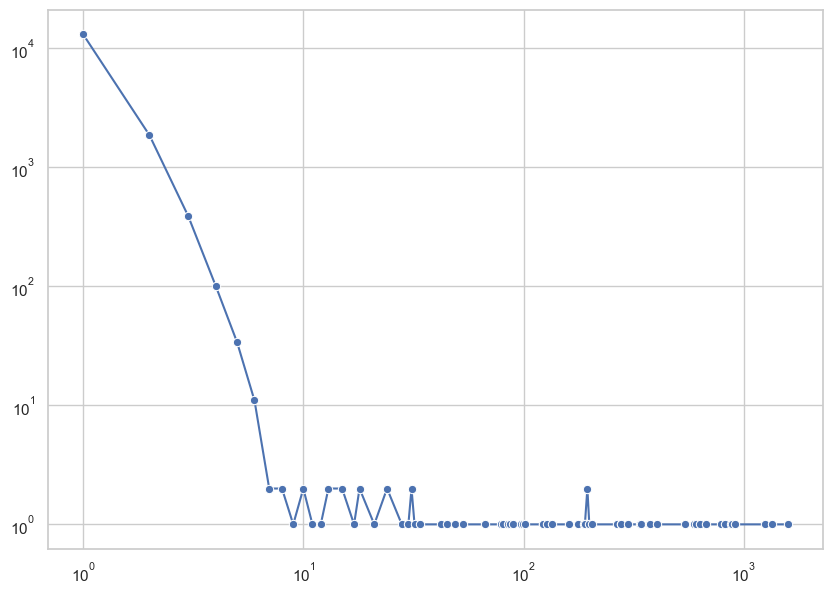

In [26]:
sns.set_theme(style="whitegrid")

grados = [d for n, d in G.degree()]
grados_ord = sorted(set(grados))
conteo = [grados.count(g) for g in grados_ord]

f, ax = plt.subplots(figsize=(10, 7))
ax.set(xscale="log", yscale="log")
sns.lineplot(x=grados_ord, y=conteo, ax=ax, marker='o', markersize=6)

## Análisis de comunidades

In [17]:
import community as community_louvain

# Obtenemos la partición de comunidades obtenida por Gephi
particion = {row[0]: row[1] for row in pd.read_csv('particion.csv').to_numpy()}
particion

# Calculamos la modularidad de la partición
modularidad = community_louvain.modularity(particion, G)
num_comunidades = len(set(particion.values()))

print(f'Número de comunidades: {num_comunidades}')
print(f"Modularidad: {modularidad:.3f}")

Número de comunidades: 10
Modularidad: 0.611


Tenemos un total de `10 comunidades` con una modularidad de `0.611`. Dado que esta modularidad es mayor que 0.4 podemos concluir que la estructura de comunidad existe.

### Distribución de las comunidades respecto de la cantidad de nodos de la red:

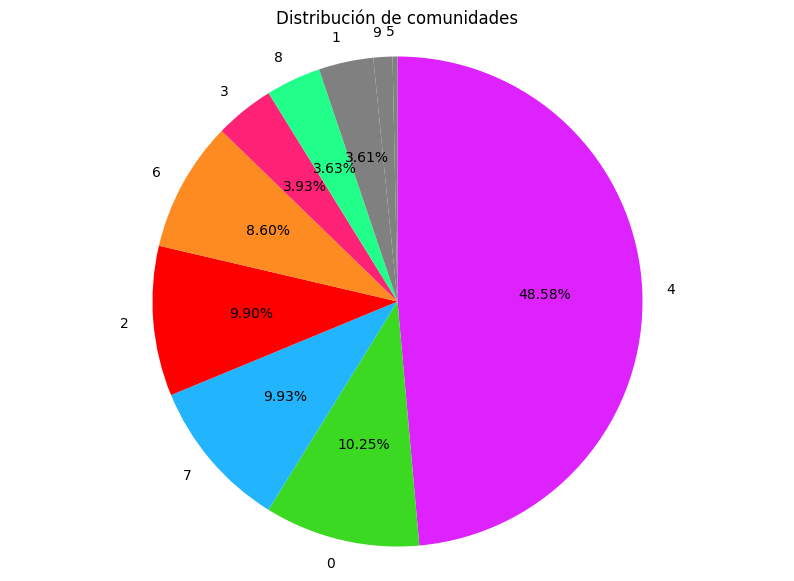

In [20]:
from collections import Counter

# Contamos cuántas veces aparece cada comunidad
conteo = Counter(list(particion.values()))

ordenado = sorted(conteo.items(), key=lambda x: x[1], reverse=True)
etiquetas = [str(k) for k, v in ordenado]
valores = [v for k, v in ordenado]

plt.figure(figsize=(10, 7))
plt.pie(valores, labels=etiquetas, autopct=lambda x: '%1.2f%%' % x if x > 3 else '', startangle=90, counterclock=False,
        colors=['#dd22fe', '#3bd922', '#22b5fe', 'red', '#fe8a22', '#fe2276', '#22fe8a', 'grey', 'grey', 'grey'])
plt.title('Distribución de comunidades')
plt.axis('equal')
plt.show()

Vista esta gráfica, podemos apreciar que las 5 comunidades más grandes de la red representan más del 75% del total de nodos. Además, la comunidad más predominante es la número 4 que supone prácticamente la mitad de la red.

In [12]:
# Obtenemos las comunidades separadas en listas
comunidades = []
aux = []
for cid in list(set(particion.values())):
    for node in particion.keys():
        if particion[node] == cid:
            aux.append(node)
    comunidades.append(aux)
    aux = []


### Vamos a estudiar cómo es la interacción entre comunidades:

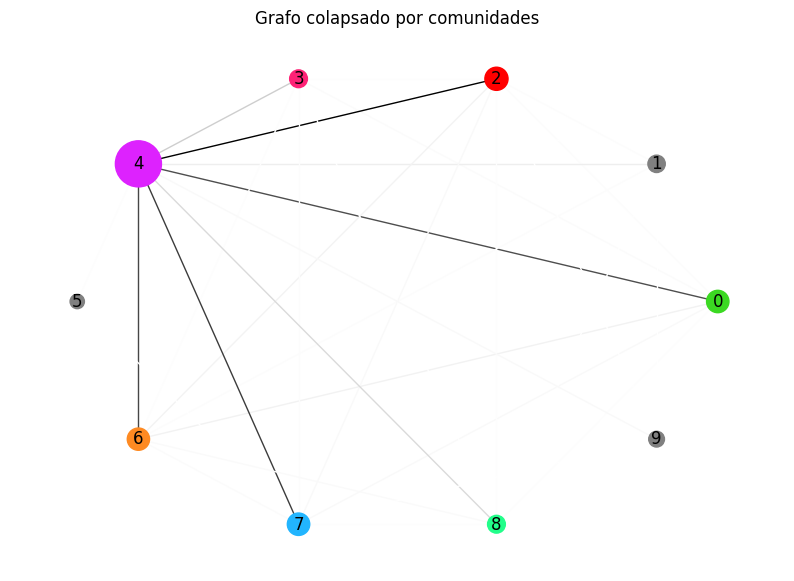

In [21]:
from cdlib import algorithms
from collections import defaultdict

# Añadir la comunidad de pertenencia como atributo a cada nodo
attributes = {}
for cid, nodes in enumerate(comunidades):
    for nid in nodes:
        attributes[nid] = {"community": cid}
nx.set_node_attributes(G, attributes)

# Calcular la betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Función para calcular el peso de las aristas entre comunidades
def calculate_edge_weight(nodes_1, nodes_2):
    weight = 0
    for node_1 in nodes_1:
        for node_2 in nodes_2:
            if G.has_edge(node_1, node_2):
                weight += 1
    return weight

comunidad_nodos = defaultdict(set)
for nodo, datos in G.nodes(data=True):
    comunidad_id = datos['community']
    comunidad_nodos[comunidad_id].add(nodo)

# Colapsar el grafo en comunidades usando esa partición ordenada
G_coms = nx.quotient_graph(
    G,
    partition=[comunidad_nodos[cid] for cid in sorted(comunidad_nodos)],
    edge_data=lambda sx, sy: {"weight": calculate_edge_weight(sx, sy)},
    node_data=lambda n: {
        "community": G.nodes[list(n)[0]]['community'],
        "size": len(n),
        "betweenness": sum(betweenness[n] for n in list(n))
    },
    relabel=True
)

# Normalizar el peso de las aristas
if len(G_coms.edges) > 0:
    max_weight = max(G_coms.edges[e]["weight"] for e in G_coms.edges)
    min_weight = min(G_coms.edges[e]["weight"] for e in G_coms.edges)
    for e in G_coms.edges:
        G_coms.edges[e]["weight"] = (G_coms.edges[e]["weight"] - min_weight) / (max_weight - min_weight + 1e-6)

# Definir tamaño de nodos en función de la betweenness centrality
max_betweenness = max(G_coms.nodes[node]['betweenness'] for node in G_coms.nodes())
node_sizes = [(G_coms.nodes[node]['betweenness'] / max_betweenness) * 1000 + 100 for node in G_coms.nodes()]

pos = nx.circular_layout(G_coms)

# Dibujar el grafo colapsado por comunidades
plt.figure(figsize=(10, 7))
nx.draw_networkx(
    G_coms,
    pos,
    with_labels=True,
    node_size=node_sizes,  # Tamaño basado en betweenness
    edge_color=[G_coms.edges[e]["weight"] for e in G_coms.edges] if G_coms.edges else [],
    node_color=['#3bd922', 'grey', 'red', '#fe2276', '#dd22fe', 'grey', '#fe8a22', '#22b5fe', '#22fe8a', 'grey'],
    edge_cmap=plt.cm.Greys,
)

plt.title("Grafo colapsado por comunidades")
plt.axis('off')
plt.show()

Esta visualización muestra claramente que la comunidad que más interactúa con el resto es la número 4 seguida por las comunidades 0, 2, 6, y 7.

Por el contrario, las comunidades 1, 5 y 9 apenas interactúan con el exterior.

### Para cada comunidad vamos a obtener los 5 nodos con mayor pagerank y betweenness:

In [ ]:
# Asignar el grado a cada nodo como atributo
grado = nx.degree(G)

attributes = {}
for nid in G.nodes:
    attributes[nid] = {"grado": grado[nid]}
nx.set_node_attributes(G, attributes)

# Calcular el pagerank de G
pr = nx.pagerank(G)

# Asignar el pagerank a cada nodo como atributo
attributes = {}
for nid in G.nodes:
    attributes[nid] = {"pagerank": pr[nid]}
nx.set_node_attributes(G, attributes)

# Asignar el betweenness a cada nodo como atributo
attributes = {}
for nid in G.nodes:
    attributes[nid] = {"betweenness": betweenness[nid]}
nx.set_node_attributes(G, attributes)

# Imprimir los primeros 5 nodos de cada comunidad con el mayor pagerank
com_ids = set([G.nodes[n]['community'] for n in G.nodes])
for cid in com_ids:
    print(f"Comunidad {cid}:")
    centralities = pd.DataFrame([G.nodes[n] for n in G.nodes if G.nodes[n]['community'] == cid], index=[n for n in G.nodes if G.nodes[n]['community'] == cid])
    display(centralities.sort_values(by="pagerank", ascending=False).head(5))

Comunidad 0:


,community,grado,pagerank,betweenness
FCBarcelona,0,1584,0.040580,0.181104
Pedri,0,176,0.004586,0.019361
gxldeadam,0,122,0.003050,0.017922
khushbookadri,0,5,0.000153,0.000513
LxoMessismoFCB,0,7,0.000152,0.004824


Comunidad 1:


,community,grado,pagerank,betweenness
AthleticClub,1,593,0.015932,0.069109
Gorritazuri_ATH,1,3,0.000077,0.002218
DonUnai23,1,3,0.000074,0.001227
DonPedro7FCB,1,3,0.000072,0.003795
Ravynoxofficial,1,3,0.000068,0.000682


Comunidad 2:


,community,grado,pagerank,betweenness
SevillaFC,2,594,0.016134,0.072510
RCDEspanyol,2,610,0.014649,0.065444
DAZN_ES,2,404,0.009229,0.046508
Estadio_ED,2,49,0.001176,0.004412
baiaian,2,31,0.000722,0.002357


Comunidad 3:


,community,grado,pagerank,betweenness
Atleti,3,635,0.016341,0.072230
GxlDeNahuel,3,24,0.000547,0.003059
dav_falos,3,5,0.000112,0.000664
AB_Josephe,3,5,0.000111,0.002892
PedroBDonoso,3,4,0.000090,0.001507


Comunidad 4:


,community,grado,pagerank,betweenness
marca,4,1350,0.026573,0.197515
elchiringuitotv,4,884,0.020937,0.088022
AlbertOrtegaES1,4,874,0.020543,0.095590
Osasuna,4,819,0.019505,0.094626
ArchivoVAR,4,909,0.019135,0.088598


Comunidad 5:


,community,grado,pagerank,betweenness
FodechinchosG,5,28,0.000808,0.003337
MCeleste1923,5,21,0.000520,0.001845
Victor28505290,5,3,0.000076,0.000901
CoutinhoA_,5,2,0.000056,0.002631
jorgenwester,5,2,0.000051,0.000279


Comunidad 6:


,community,grado,pagerank,betweenness
valenciacf,6,786,0.019331,0.087455
VillarrealCF,6,299,0.007709,0.032485
RayoVallecano,6,204,0.005279,0.022606
Offsider_ES,6,123,0.002857,0.010912
javipucela_,6,102,0.002466,0.015771


Comunidad 7:


,community,grado,pagerank,betweenness
realmadrid,7,1251,0.031814,0.140734
HdeHelena_RM,7,195,0.004656,0.018246
AlertaNews24,7,161,0.004570,0.019580
Mario___RM,7,128,0.003284,0.013950
trunksRM,7,42,0.001000,0.004081


Comunidad 8:


,community,grado,pagerank,betweenness
GironaFC,8,541,0.013952,0.061522
RealSociedad,8,31,0.000797,0.003486
QuirosRuiz,8,18,0.000445,0.001444
Pedriscopio1899,8,18,0.000413,0.002338
FlashscoreES,8,5,0.000118,0.004994


Comunidad 9:


,community,grado,pagerank,betweenness
FonsiLoaiza,9,195,0.005412,0.023288
VictorJDJ65,9,4,0.000091,0.002351
paudunyo,9,4,0.000089,0.003723
Endika62078057,9,3,0.000074,0.002860
macenolo1959,9,3,0.000074,0.002929


Con estas tablas podemos inferir que los líderes de opinión en cada comunidad son:


<ul style="font-size:17px">
    <li>Comunidad 0: FC Barcelona (equipo de fútbol)</li>
    <li>Comunidad 1: Athletic Club de Bilbao (equipo de fútbol)</li>
    <li>Comunidad 2: Sevilla FC y RCD Espanyol (equipos de fútbol)</li>
    <li>Comunidad 3: Atlético de Madrid (equipo de fútbol)</li>
    <li>Comunidad 4: Marca, ElChiringuitoTV y Albert Ortega (medios de comunicación y periodistas)</li>
    <li>Comunidad 5: usuarios anónimos</li>
    <li>Comunidad 6: Valencia CF y Villarreal CF (equipos de fútbol)</li>
    <li>Comunidad 7: Real Madrid (equipo de fútbol)</li>
    <li>Comunidad 8: Girona FC y Real Sociedad (equipos de fútbol)</li>
    <li>Comunidad 9: Fonsi Loaiza (periodista)</li>
</ul>

### Vamos a sacar los 10 nodos más importantes según las medidas de centralidad:

In [23]:
top10 = pd.DataFrame([G.nodes[n] for n in G.nodes], index=[n for n in G.nodes]).sort_values(by='pagerank', ascending=False).head(10)
top10

,community,grado,pagerank,betweenness
FCBarcelona,0,1584,0.040580,0.181104
realmadrid,7,1251,0.031814,0.140734
marca,4,1350,0.026573,0.197515
elchiringuitotv,4,884,0.020937,0.088022
AlbertOrtegaES1,4,874,0.020543,0.095590
Osasuna,4,819,0.019505,0.094626
valenciacf,6,786,0.019331,0.087455
ArchivoVAR,4,909,0.019135,0.088598
GetafeCF,4,674,0.017532,0.080259
Atleti,3,635,0.016341,0.072230


Con estos datos podemos deducir que entre los 10 nodos más importantes hay: `6 equipos`, `3 medios de comunicación` y `1 periodista`.

### Vamos a analizar las pandillas:

In [25]:
pandillas = list(nx.find_cliques(G))

# Obtenemos el máximo número de integrantes en una pandilla
maximo_pandilla = max([len(pandilla) for pandilla in pandillas])
pandillas_importantes = [pandilla for pandilla in pandillas if len(pandilla) == maximo_pandilla]

print(f'Número máximo de integrantes en una pandilla: {maximo_pandilla}')
print(f'Número de pandillas formadas por {maximo_pandilla} miembros: {len(pandillas_importantes)}')

Número máximo de integrantes en una pandilla: 3
Número de pandillas formadas por 3 miembros: 145
